## Install tensorflow dependencies

In [1]:
import os 
import sys
# Füge das übergeordnete Verzeichnis zum Python-Modulsuchpfad hinzu
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
src_path = os.path.abspath(os.path.join('../../..'))
if src_path not in sys.path:
    sys.path.append(src_path)
input_file_path = "./../../../timeseries/merged/combined_timeseries.csv"
prepared_input_file_path = "./../../../timeseries/combined/combined_timeseries_final.csv"

from app.predictor.evaluation_models.neural_networks.networks import SequentialNetwork

## Install all other dependencies

In [2]:
ann = SequentialNetwork(input_file_path, 'mean_squarred_error', 200, 0.0, 0.005)

ann.load_and_prepare_data(drop_features=True)

ann.compile_model()

ann.evaluate_model()

Epoch 1/200


/Users/simonunterlugauer/Desktop/masterarbeit-cluster/performance-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - loss: 5738266.5000
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 3020862.7500
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 2763903.7500
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 3169822.0000
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 2737039.0000
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 4777048.0000
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 2956105.5000
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 3598983.0000
Epoch 9/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 2787329.2500
Epoch 10/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 2578499.0000
Epoch 11/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 3344101.0000
Epoch 12/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 2960801.0000
Epoch 13/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 3375309.7500
Epoch 14/200
126/126

In [3]:
from scikeras.wrappers import KerasRegressor

ann = SequentialNetwork(prepared_input_file_path, 'mean_squarred_error', 150, 0.2, 0.03)

ann.load_and_prepare_data(drop_features=True)

results = ann.search_for_best_model()

# def build_regressor():
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(ann.X_train.shape[1],)),  
#         Dense(64, activation='relu'), 
#         Dropout(0.2),
#         Dense(1)  # Für Regression ist die Ausgangsschicht typischerweise eine einzelne Einheit ohne Aktivierungsfunktion
#     ])
#     model.compile(optimizer='adam', loss='mean_squared_error')  # Hier fügen wir den Compile-Schritt hinzu
#     return model

# regressor = KerasRegressor(model=build_regressor(), epochs=100, batch_size=10, verbose=0)

# # Trainieren des Modells
# regressor.fit(ann.X_train, ann.y_train)

# predictions = regressor.predict(ann.X_test)


In [7]:
results.head(50)

,Neurons,Dropout_Rate,Learning_Rate,Epochs,Batch_Size,R2_Score,Loss
47,128,0.0,0.005,500,32,0.913501,497565.90625
44,128,0.0,0.010,500,32,0.906109,540082.75000
83,256,0.0,0.005,500,32,0.905124,545751.56250
90,256,0.1,0.010,150,32,0.904318,550384.12500
8,64,0.0,0.010,500,32,0.903621,554396.56250
53,128,0.1,0.030,500,32,0.903438,555449.18750
107,256,0.2,0.005,500,32,0.903180,556930.37500
82,256,0.0,0.005,250,32,0.902252,562268.31250
4,64,0.0,0.030,250,32,0.901986,563803.81250
32,64,0.2,0.010,500,32,0.901021,569349.06250


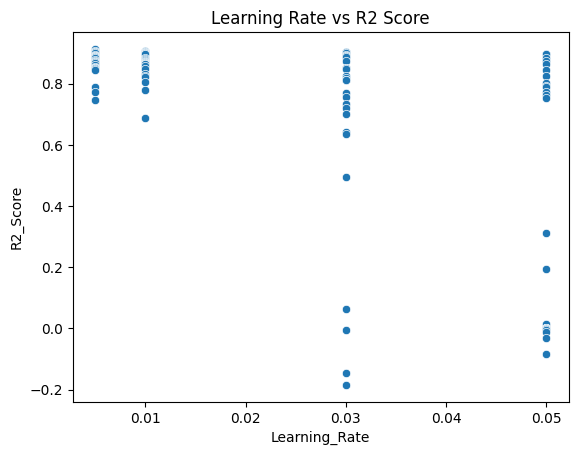

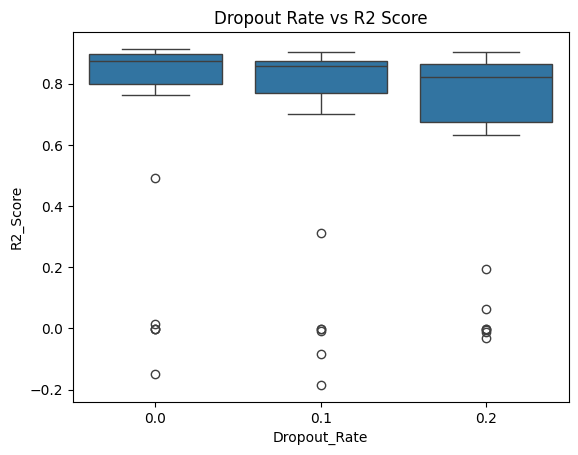

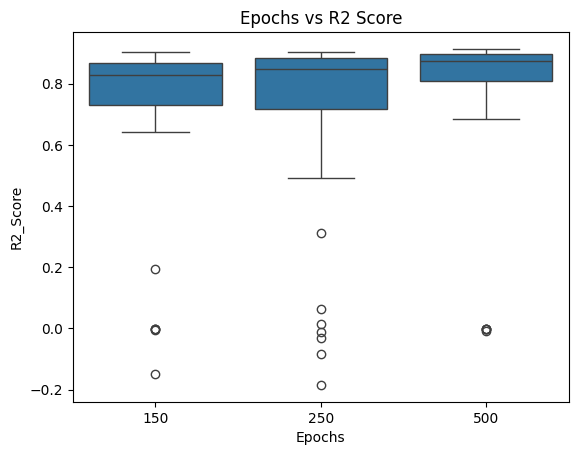

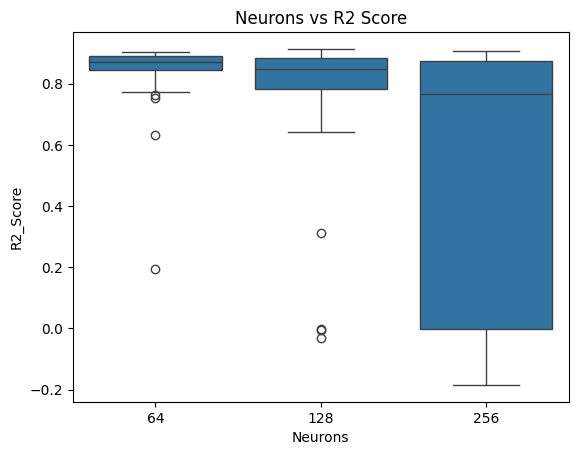

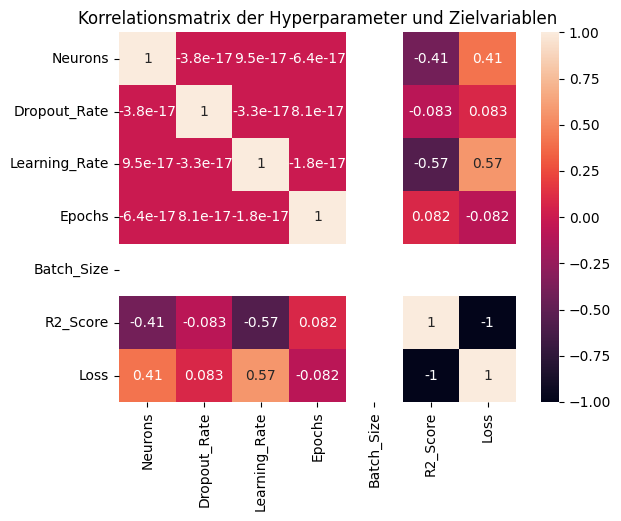

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Angenommen, dein DataFrame heißt df

# Scatterplot für Learning_Rate gegen R2_Score
sns.scatterplot(data=results, x='Learning_Rate', y='R2_Score')
plt.title('Learning Rate vs R2 Score')
plt.show()

# Boxplot für Dropout_Rate gegen R2_Score
sns.boxplot(data=results, x='Dropout_Rate', y='R2_Score')
plt.title('Dropout Rate vs R2 Score')
plt.show()

# Boxplot für Dropout_Rate gegen R2_Score
sns.boxplot(data=results, x='Epochs', y='R2_Score')
plt.title('Epochs vs R2 Score')
plt.show()

sns.boxplot(data=results, x='Neurons', y='R2_Score')
plt.title('Neurons vs R2 Score')
plt.show()

# Korrelationsmatrix
correlation_matrix = results.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Korrelationsmatrix der Hyperparameter und Zielvariablen')
plt.show()

In [3]:
ann = SequentialNetwork(prepared_input_file_path, 'mean_squarred_error', 200, 0.1, 0.01)

ann.load_and_prepare_data(drop_features="remove_pod_metrics")

ann.compile_model()

ann.evaluate_model()

Epoch 1/200


/Users/simonunterlugauer/Desktop/masterarbeit-cluster/performance-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7240606.5000 - val_loss: 3202954.2500
Epoch 2/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 4728424.0000 - val_loss: 3229621.5000
Epoch 3/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 3702690.5000 - val_loss: 3054577.5000
Epoch 4/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 4667749.0000 - val_loss: 2724219.5000
Epoch 5/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4825244.0000 - val_loss: 2621778.5000
Epoch 6/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 3462475.7500 - val_loss: 2378065.5000
Epoch 7/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 3295805.5000 - val_loss: 2764111.2500
Epoch 8/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 4239142.0000 - val_loss: 2236641.5000
Epoch 9/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 2920898.2500 - val_loss: 2318646.2500
Epoch 10/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 3531436.0000 - val_loss: 2816444.5000
Epo

In [4]:
ann = SequentialNetwork(prepared_input_file_path, 'mean_squarred_error', 500, 0.1, 0.005)

ann.load_and_prepare_data(drop_features=True)

ann.compile_model()

ann.evaluate_model()

Epoch 1/500


/Users/simonunterlugauer/Desktop/masterarbeit-cluster/performance-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5836809.5000 - val_loss: 2506471.5000
Epoch 2/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 4910499.5000 - val_loss: 2381790.5000
Epoch 3/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 4631588.5000 - val_loss: 2625760.7500
Epoch 4/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 3713280.2500 - val_loss: 2603153.5000
Epoch 5/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 3329570.5000 - val_loss: 2184364.5000
Epoch 6/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 2679485.5000 - val_loss: 2372894.2500
Epoch 7/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 2925401.5000 - val_loss: 2559245.5000
Epoch 8/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 2596189.7500 - val_loss: 2389221.2500
Epoch 9/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 3246235.2500 - val_loss: 2128654.7500
Epoch 10/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 3164578.2500 - val_loss: 2275766.0000
Epo